Let's try detecting corners on images. To verify that the corner detector works perfectly, we start with a checkerboard pattern and make sure that corners are detected on the four corners of each grid on the checkerboard.

In [1]:
!pip install -q gdown

In [34]:
!gdown --id 1BEK4DnnkEOl8dKl8lwSjbeVQCFSJgfdg -O checkerboard_img.png

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1BEK4DnnkEOl8dKl8lwSjbeVQCFSJgfdg
To: /content/checkerboard_img.png
100% 355/355 [00:00<00:00, 1.25MB/s]


(200, 200)


(np.float64(-0.5), np.float64(199.5), np.float64(199.5), np.float64(-0.5))

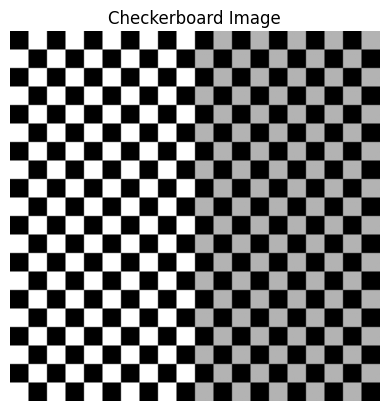

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import cv2

checkerboard_img = imageio.imread("/content/checkerboard_img.png")
print(checkerboard_img.shape)

plt.figure(1)
plt.imshow(checkerboard_img, cmap='gray')
plt.title("Checkerboard Image")
plt.axis("off")

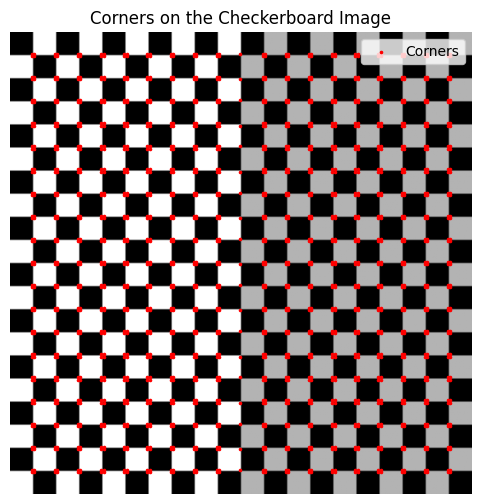

In [64]:
def get_corners(img, sobel_size=5, gauss_ksize=5, gauss_sigma=1):
  # Compute gradients in both x and y directions
  Ix = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=sobel_size)
  Iy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=sobel_size)

  # Compute products of derivatives
  Ixx = Ix * Ix
  Iyy = Iy * Iy
  Ixy = Ix * Iy

  # Apply Gaussian filter to smooth the products
  Ixx = cv2.GaussianBlur(Ixx, (gauss_ksize, gauss_ksize), gauss_sigma)
  Iyy = cv2.GaussianBlur(Iyy, (gauss_ksize, gauss_ksize), gauss_sigma)
  Ixy = cv2.GaussianBlur(Ixy, (gauss_ksize, gauss_ksize), gauss_sigma)

  # calculate the Harris response
  k = 0.04
  detM = Ixx * Iyy - Ixy * Ixy
  traceM = Ixx + Iyy
  R = detM - k * (traceM ** 2)

  # Normalize response
  R_norm = cv2.normalize(R, None, 0, 255, cv2.NORM_MINMAX)

  # Non-Maximum Suppression (NMS)
  thresh = 0.01 * R.max()

  # Binary map of candidate corners
  candidate_mask = (R > thresh)

  # Keep only local maxima
  kernel = np.ones((3, 3), np.uint8)
  local_max = (R == cv2.dilate(R, kernel))
  b_corner_points = np.logical_and(candidate_mask, local_max)
  ys, xs = np.where(b_corner_points)
  return ys, xs


checkerboard_img = np.float32(checkerboard_img)
corners_y, corners_x = get_corners(checkerboard_img)

# Display results
plt.figure(figsize=(6, 6))
plt.imshow(np.uint8(checkerboard_img), cmap='gray')
plt.scatter(corners_x, corners_y, s=10, c='red', marker='.', label='Corners')
plt.title("Corners on the Checkerboard Image")
plt.axis("off")
plt.legend()
plt.show()



In [47]:
!gdown --id 132QiEWBa8SqbQC4Y1AAAYwEFUho7zX0E -O chiangheng.png

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=132QiEWBa8SqbQC4Y1AAAYwEFUho7zX0E
To: /content/chiangheng.png
100% 1.48M/1.48M [00:00<00:00, 138MB/s]


(np.float64(-0.5), np.float64(1279.5), np.float64(799.5), np.float64(-0.5))

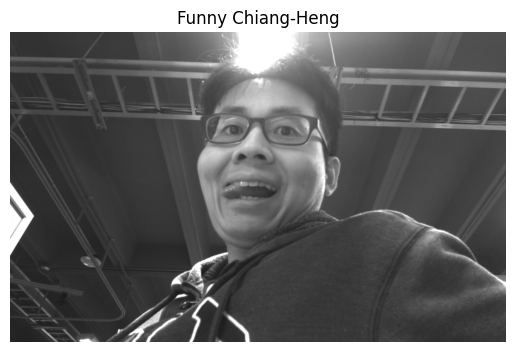

In [59]:
funny_chiangheng_img = imageio.imread("/content/chiangheng.png")

plt.figure(2)
plt.imshow(funny_chiangheng_img, cmap='gray')
plt.title("Funny Chiang-Heng")
plt.axis("off")

Number of corners = 87


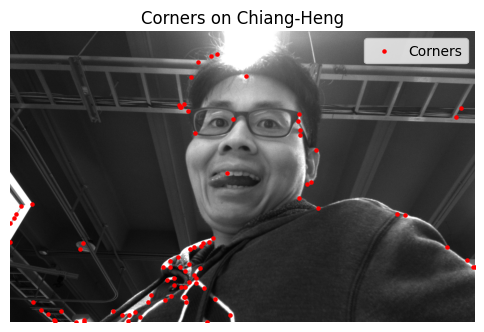

In [78]:
gray_img = cv2.cvtColor(funny_chiangheng_img, cv2.COLOR_BGR2GRAY)

corners_y, corners_x = get_corners(np.float32(gray_img), 3, 17, 5)
print(f'Number of corners = {len(corners_y)}')

# Display results
plt.figure(figsize=(6, 6))
plt.imshow(np.uint8(gray_img), cmap='gray')
plt.scatter(corners_x, corners_y, s=20, c='red', marker='.', label='Corners')
plt.title("Corners on Chiang-Heng")
plt.axis("off")
plt.legend()
plt.show()

Number of detected SIFT keypoints = 873
Descriptor shape of SIFT features = (873, 128)
Point: (3.072052478790283, 422.1648254394531), Size: 1.9810943603515625, Angle: 320.9033203125
Point: (4.510279655456543, 428.18316650390625), Size: 2.2082021236419678, Angle: 320.37158203125
Point: (5.9869208335876465, 449.4486389160156), Size: 1.8720139265060425, Angle: 141.03411865234375
Point: (5.996359825134277, 430.0113830566406), Size: 2.039663314819336, Angle: 321.8804626464844
Point: (7.665172576904297, 687.8562622070312), Size: 1.9661931991577148, Angle: 90.38921356201172
Point: (12.630181312561035, 457.947265625), Size: 2.19962477684021, Angle: 141.57301330566406
Point: (14.002148628234863, 441.0563659667969), Size: 2.1395325660705566, Angle: 324.2784118652344
Point: (16.104806900024414, 462.4940490722656), Size: 2.155773162841797, Angle: 141.15614318847656
Point: (17.276193618774414, 215.5175018310547), Size: 6.387526512145996, Angle: 35.00202178955078
Point: (17.276193618774414, 215.5175

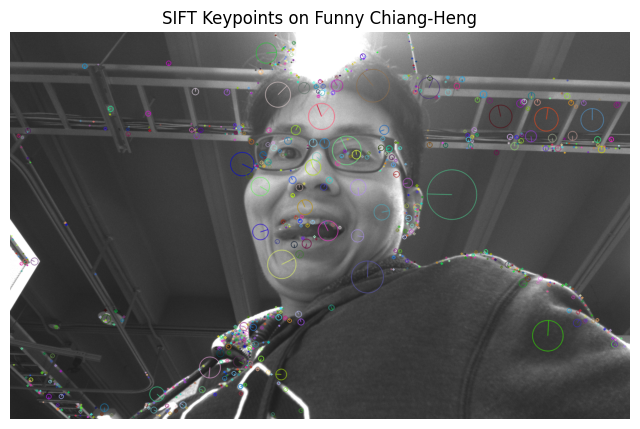

In [83]:
# Create SIFT constructor
sift = cv2.SIFT_create()

# Detect SIFT keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(funny_chiangheng_img, None)

print(f"Number of detected SIFT keypoints = {len(keypoints)}")
print(f"Descriptor shape of SIFT features = {descriptors.shape}")

for kp in keypoints[:10]:  # show first 10
    print(f"Point: {kp.pt}, Size: {kp.size}, Angle: {kp.angle}")

# Superimpose keypoints on the image
img_kp = cv2.drawKeypoints(
    funny_chiangheng_img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img_kp, cv2.COLOR_BGR2RGB))
plt.title("SIFT Keypoints on Funny Chiang-Heng")
plt.axis("off")
plt.show()